<a href="https://colab.research.google.com/github/SnipeHunting/MQ135-Air-Quality-with-ST7735-Display/blob/master/Voids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [298]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from google.colab.patches import cv2_imshow

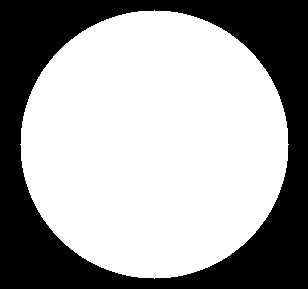

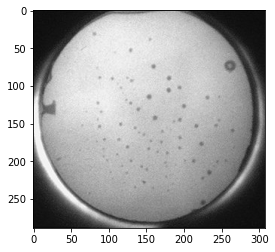

In [299]:
image = cv2.imread('Voids9.jpg')
#square_image = np.zeros((image.shape[0],image.shape[1],1),np.uint8)
#cv2.rectangle(square_image,(0,0),(image.shape[0],image.shape[1]),255,-1)
circle = np.zeros((image.shape[0],image.shape[1],1),np.uint8)
x = int(round(image.shape[0]/2,0))
y = int(round(image.shape[1]/2,0))
radius = np.minimum(x,y)-10
cv2.circle(circle,(y,x),radius,(255,255,255),-1)
cv2_imshow(circle)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

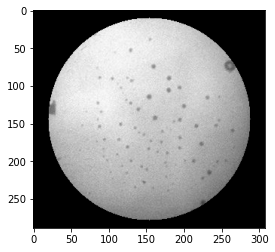

In [300]:
# both square and curcle intersect
AND_Operation = cv2.bitwise_and(gray,circle)
#OR_Operation = cv2.bitwise_or(gray,circ)
#XOR_Operation = cv2.bitwise_xor(gray,circ)
#Not_Operation = cv2.bitwise_not(gray,circ)

plt.imshow(AND_Operation, cmap='gray')
#cv2.destroyAllWindows()

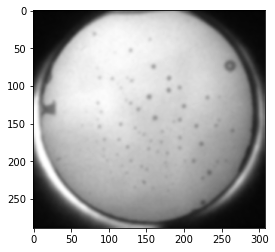

In [301]:
blur = cv2.GaussianBlur(gray,(9,9),0)
plt.imshow(blur, cmap='gray')

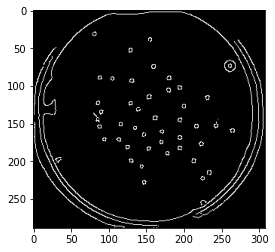

In [318]:
canny=cv2.Canny (blur,12,50,1)
plt.imshow(canny, cmap='gray')

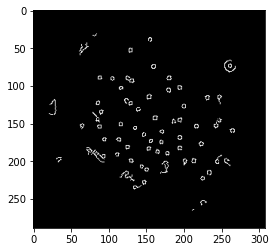

In [309]:
# both square and curcle intersect
AND_Op= cv2.bitwise_and(canny,circle)
plt.imshow(AND_Op, cmap='gray')
#cv2.destroyAllWindows()

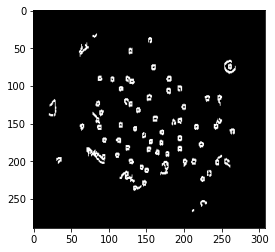

In [310]:
dilated = cv2.dilate(AND_Op, (1,1),iterations = 2)
plt.imshow(dilated, cmap='gray')

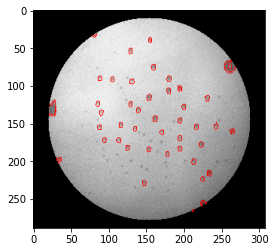

In [305]:
(cnt,heirarchy) = cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(AND_Operation,cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb,cnt,-1,(255,0,0),1)
plt.imshow(rgb)

In [306]:
print('Voids on wafer: ', len(cnt))

Voids on wafer:  46
